,Data,Canal,Total de acessos,Total de erros,Incidentes,MTTR,Custo
0,2020-01-01,Atendimento,185592,1590,0.0,0.00,0.00
1,2020-01-01,Loja Física,106803,189,0.0,0.00,0.00
2,2020-01-01,Loja Virtual,2275347,7909,0.0,0.00,0.00
3,2020-01-02,Atendimento,1214815,15718,1.0,1.03,7.05
4,2020-01-02,Loja Física,443151,1505,0.0,0.00,0.00


,Data,Total de acessos,Total de erros,Incidentes,MTTR,Custo
count,1970-01-01 00:00:00.000002190,2190,2190,2190.0,2190.00,2190.00
mean,2020-12-30 14:12:09.863013632,1823397,19606,0.0,1.20,10.51
min,2020-01-01 00:00:00.000000000,59570,189,0.0,0.00,0.00
25%,2020-07-01 00:00:00.000000000,323839,1861,0.0,0.00,0.00
50%,2020-12-30 12:00:00.000000000,781474,4967,0.0,0.00,0.00
75%,2021-07-01 00:00:00.000000000,3644605,24362,0.0,0.00,0.00
max,2021-12-31 00:00:00.000000000,8209224,792575,1.0,149.74,1472.45
std,NaT,1970864,42495,0.0,7.92,70.33


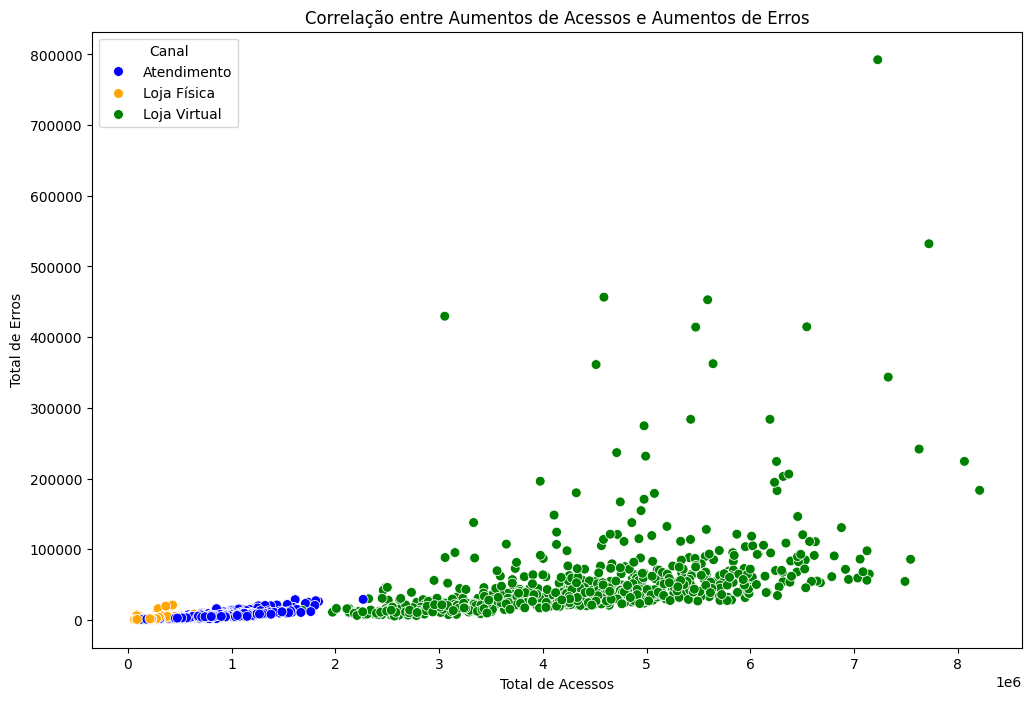

C:\Users\MAPSILV\AppData\Local\Temp\ipykernel_26680\216676537.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incidentes['MTTR_Categoria'] = pd.cut(df_incidentes['MTTR'], bins=bins, labels=labels, right=False)
C:\Users\MAPSILV\AppData\Local\Temp\ipykernel_26680\216676537.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mttr_distribution = df_incidentes.groupby(['Canal', 'MTTR_Categoria']).size().reset_index(name='Count')
C:\Users\MAPSILV\AppData\Local\Temp\ipykernel_26680\216676537.py:68: FutureWarning: 

Passing `palette` without assigning `hue`

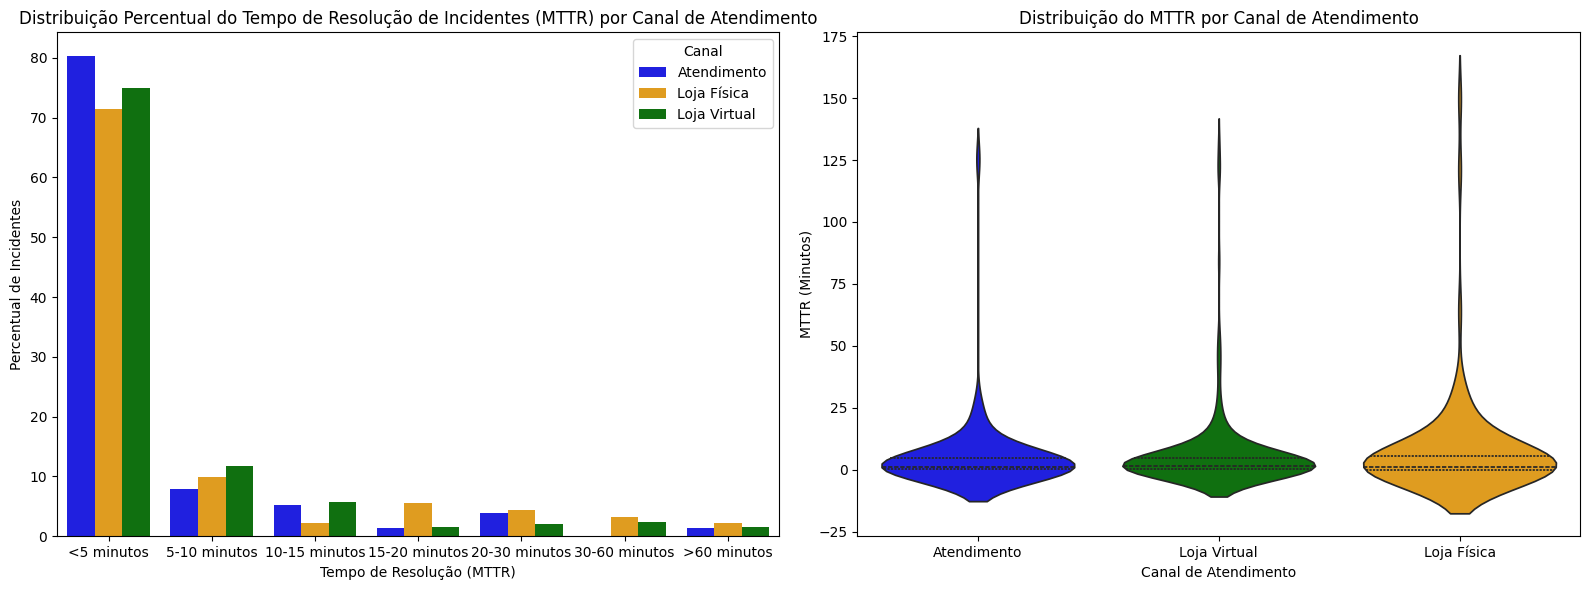

C:\Users\MAPSILV\AppData\Local\Temp\ipykernel_26680\216676537.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Canal', y='Custo Médio por Incidente', data=custo_medio_por_incidente, palette=palette, ax=axes[0])


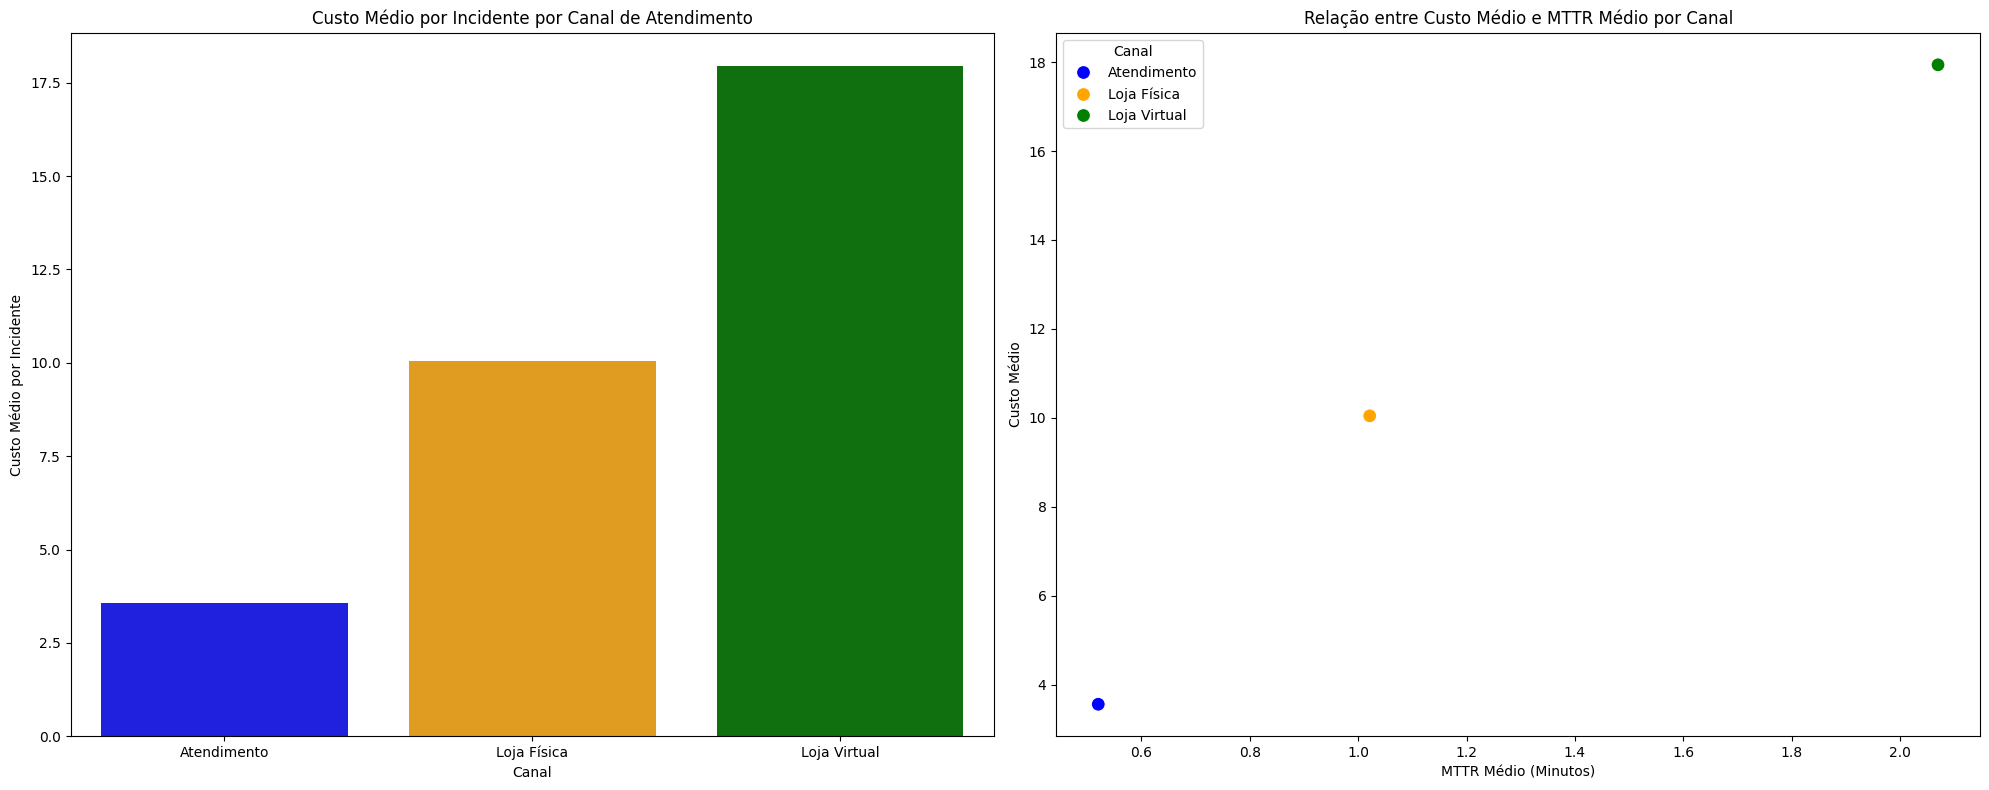

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file = r'C:\Users\MAPSILV\Downloads\Teste.xlsx'

df = pd.read_excel(file, sheet_name='DADOS')

#Tratamento dos Dados

df['Data'] = pd.to_datetime(df['Data'])
df['Total de acessos'] = round(df['Total de acessos'].astype(int))
df['Total de erros'] = round(df['Total de erros'].astype(int))
df['MTTR'] = round(df['_MTTR Incidente [min]'].astype(float), 2)
df['Custo'] = round(df['_Custo Incidente [R$]'].astype(float), 2)
df['Incidentes'] = df['_Incidente'].astype(float)
df = df[['Data', 'Canal', 'Total de acessos', 'Total de erros', 'Incidentes', 'MTTR', 'Custo']]

# Verificar os primeiros registros para garantir que os dados foram carregados corretamente
display(df.head())

#Diagnostico
geral = df.describe()
geral['Data'] = pd.to_datetime(geral['Data'])
geral['Total de acessos'] = round(geral['Total de acessos'].astype(int))
geral['Total de erros'] = round(geral['Total de erros'].astype(int))
geral['MTTR'] = round(geral['MTTR'].astype(float),2)
geral['Custo'] = round(geral['Custo'].astype(float),2)
geral['Incidentes'] = round(geral['Incidentes'].astype(float))
display(geral)


# Definir uma paleta de cores personalizada para os canais de atendimento
palette = {'Atendimento': 'blue', 'Loja Física': 'orange', 'Loja Virtual': 'green'}

# Criar o gráfico de dispersão com linha de tendência, colorindo por canal
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total de acessos', y='Total de erros', hue='Canal', data=df, palette=palette, s=50)
plt.title('Correlação entre Aumentos de Acessos e Aumentos de Erros')
plt.xlabel('Total de Acessos')
plt.ylabel('Total de Erros')
plt.legend(title='Canal')
plt.show()

# Filtrar dados para incidentes
df_incidentes = df[df['Incidentes'] == 1]
# Categorizar MTTR em intervalos de minutos
bins = [0, 5, 10, 15, 20, 30, 60, df_incidentes['MTTR'].max()]  # 0-30 min, 31-60 min, 61-90 min, 91-120 min, >120 min
labels = ['<5 minutos', '5-10 minutos', '10-15 minutos', '15-20 minutos', '20-30 minutos', '30-60 minutos', '>60 minutos']
df_incidentes['MTTR_Categoria'] = pd.cut(df_incidentes['MTTR'], bins=bins, labels=labels, right=False)
mttr_distribution = df_incidentes.groupby(['Canal', 'MTTR_Categoria']).size().reset_index(name='Count')
total_incidentes_por_canal = df_incidentes.groupby('Canal').size().reset_index(name='Total')
mttr_distribution = pd.merge(mttr_distribution, total_incidentes_por_canal, on='Canal')
mttr_distribution['Percentual'] = (mttr_distribution['Count'] / mttr_distribution['Total']) * 100

# Plotar a distribuição percentual
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(x='MTTR_Categoria', y='Percentual', hue='Canal', data=mttr_distribution, palette=palette, ax=axes[0])
axes[0].set_title('Distribuição Percentual do Tempo de Resolução de Incidentes (MTTR) por Canal de Atendimento')
axes[0].set_xlabel('Tempo de Resolução (MTTR)')
axes[0].set_ylabel('Percentual de Incidentes')
axes[0].legend(title='Canal')
sns.violinplot(x='Canal', y='MTTR', data=df_incidentes, inner="quartile", palette=palette, ax=axes[1])
axes[1].set_title('Distribuição do MTTR por Canal de Atendimento')
axes[1].set_xlabel('Canal de Atendimento')
axes[1].set_ylabel('MTTR (Minutos)')
plt.tight_layout()
plt.show()

# Custo médio por incidente para cada canal
custo_medio_por_incidente = df.groupby('Canal')['Custo'].mean().reset_index()
custo_medio_por_incidente.columns = ['Canal', 'Custo Médio por Incidente']
custo_mttr_por_canal = df.groupby('Canal').agg({'Custo': 'mean', 'MTTR': 'mean'}).reset_index()
custo_mttr_por_canal.columns = ['Canal', 'Custo Médio', 'MTTR Médio']
custo_total_por_canal = df.groupby('Canal')['Custo'].sum().reset_index()
custo_total_por_canal.columns = ['Canal', 'Custo Total']
total_incidentes = df['Custo'].sum()
percentual_custo_por_canal = custo_total_por_canal.copy()
percentual_custo_por_canal['Percentual do Custo Total'] = (percentual_custo_por_canal['Custo Total'] / total_incidentes) * 100
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x='Canal', y='Custo Médio por Incidente', data=custo_medio_por_incidente, palette=palette, ax=axes[0])
axes[0].set_title('Custo Médio por Incidente por Canal de Atendimento')
axes[0].set_ylabel('Custo Médio por Incidente')
sns.scatterplot(x='MTTR Médio', y='Custo Médio', hue='Canal', data=custo_mttr_por_canal, palette=palette, ax=axes[1], s=100)
axes[1].set_title('Relação entre Custo Médio e MTTR Médio por Canal')
axes[1].set_xlabel('MTTR Médio (Minutos)')
axes[1].set_ylabel('Custo Médio')
plt.tight_layout()
plt.show()